In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [54]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
num_features = 784 # количество атрибутов входного вектора 28 * 28 = 784

learning_rate = 0.001 # скорость обучения нейронной сети
training_steps = 3000 # максимальное число эпох
batch_size = 256 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов
display_step = 100 # каждые 100 итераций мы будем показывать текущее значение функции потерь и точности

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [55]:
# Загружаем датасет
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
print(x_train.shape)
print(y_train.shape)
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

(60000, 784)
(60000,)


In [56]:
# Створимо нейронну мережу

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Перший шар, що складається із 128 нейронів.
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1)

    # Другий шар, що складається з 256 нейронів
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2)

    # Вихідний шар
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes)

  def __call__(self, x):
    # Місце для вашого коду
    x1 = self.layer_1(x, activation=0)
    x2 = self.layer_2(x1, activation=0)
    x3 = self.layer_3(x2, activation=1)

    return x3

In [57]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))
# В качестве метрики качества используем точность
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [58]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Функція навчання нейромережі
def train(nn, input_x, output_y):
  # Для припасування ваг мережі будемо використовувати стохастичний градієнтний спуск
  optimizer = tf.optimizers.SGD(learning_rate)

  # Активація автоматичного диференціювання
  with tf.GradientTape() as g:
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)

    # Створимо список параметрів, що оптимізуються.
    trainable_variables = nn.trainable_variables

    # Обчислимо за ними значення градієнта
    gradients = g.gradient(loss, trainable_variables)

    # Модифікуємо параметри
    optimizer.apply_gradients(zip(gradients, trainable_variables))

Step: 0, Loss: 3074.45361328125, Accuracy: 0.13671875
Step: 100, Loss: 333.5027770996094, Accuracy: 0.6875
Step: 200, Loss: 175.376220703125, Accuracy: 0.79296875
Step: 300, Loss: 195.05136108398438, Accuracy: 0.75
Step: 400, Loss: 159.12344360351562, Accuracy: 0.8125
Step: 500, Loss: 133.19485473632812, Accuracy: 0.8515625
Step: 600, Loss: 111.546875, Accuracy: 0.8671875
Step: 700, Loss: 112.39532470703125, Accuracy: 0.890625
Step: 800, Loss: 127.24626159667969, Accuracy: 0.8515625
Step: 900, Loss: 118.78892517089844, Accuracy: 0.859375
Step: 1000, Loss: 130.13992309570312, Accuracy: 0.8515625
Step: 1100, Loss: 103.79108428955078, Accuracy: 0.87109375
Step: 1200, Loss: 117.65060424804688, Accuracy: 0.87890625
Step: 1300, Loss: 92.80451965332031, Accuracy: 0.90234375
Step: 1400, Loss: 78.18574523925781, Accuracy: 0.9140625
Step: 1500, Loss: 53.281883239746094, Accuracy: 0.92578125
Step: 1600, Loss: 66.60106658935547, Accuracy: 0.9296875
Step: 1700, Loss: 61.22917938232422, Accuracy: 0.

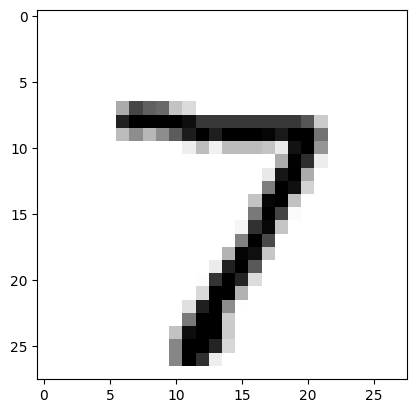

Original Labels: 7
Model prediction: 7


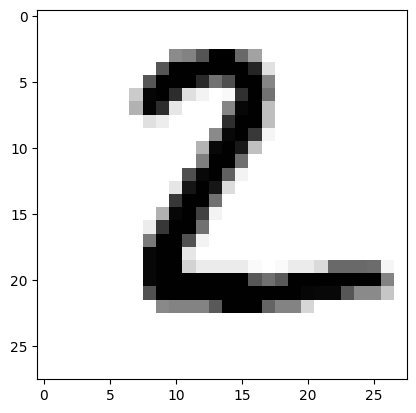

Original Labels: 2
Model prediction: 2


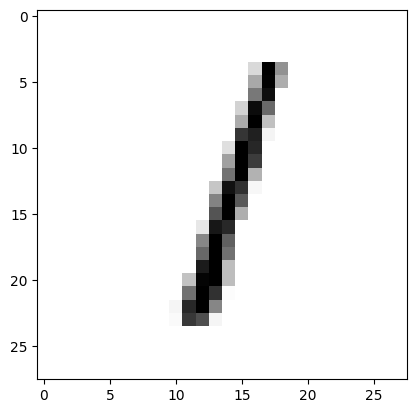

Original Labels: 1
Model prediction: 1


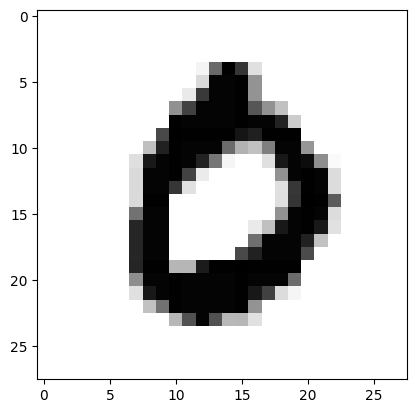

Original Labels: 0
Model prediction: 0


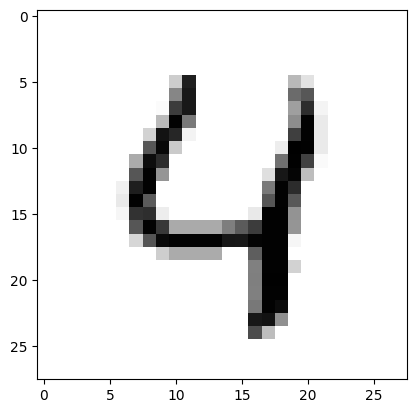

Original Labels: 4
Model prediction: 4


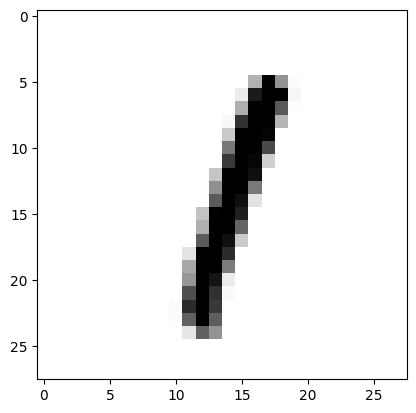

Original Labels: 1
Model prediction: 1


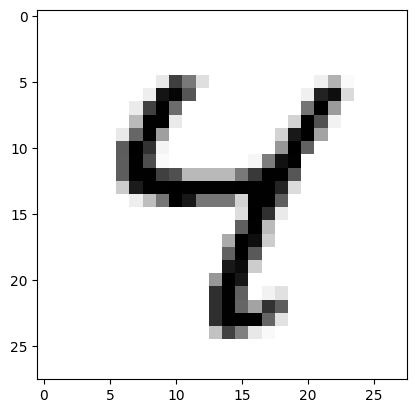

Original Labels: 4
Model prediction: 4


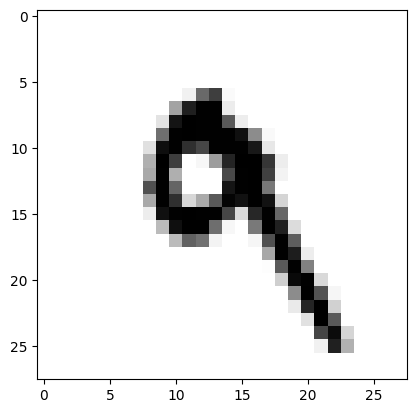

Original Labels: 9
Model prediction: 9


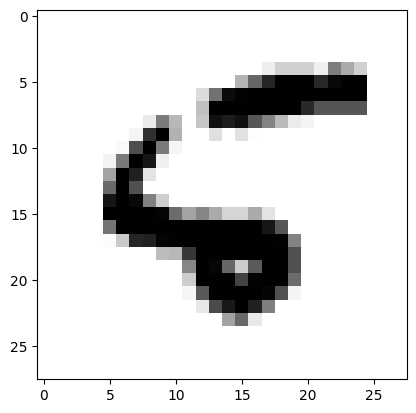

Original Labels: 5
Model prediction: 6


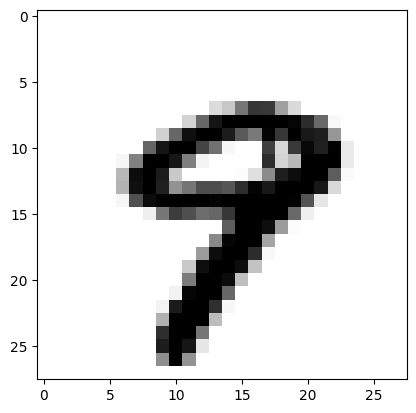

Original Labels: 9
Model prediction: 9


In [59]:
# Тренировка сети

loss_history = []  # кожні display_step кроків зберігайте в цьому списку поточну помилку нейромережі
accuracy_history = [] # кожні display_step кроків зберігайте в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# з тренувального датасету train_data вийміть випадкову підмножину, на якій
# відбудеться тренування. Використовуйте метод take, доступний для тренувального датасету.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    # Оновлюємо ваги нейронної мережі
    train(neural_net, batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)

        current_loss = cross_entropy(pred, batch_y)
        loss_history.append(current_loss)

        current_accuracy = accuracy(pred, batch_y)
        accuracy_history.append(current_accuracy)
        print(f"Step: {step}, Loss: {current_loss}, Accuracy: {current_accuracy}")


pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))


n_images = 10
predictions = neural_net(x_test)
for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    plt.imshow(np.reshape(x_test[i], [28, 28]), cmap='gray_r')
    plt.show()
    print("Original Labels: %s" % y_test[i])
    print("Model prediction: %s" % model_prediction)



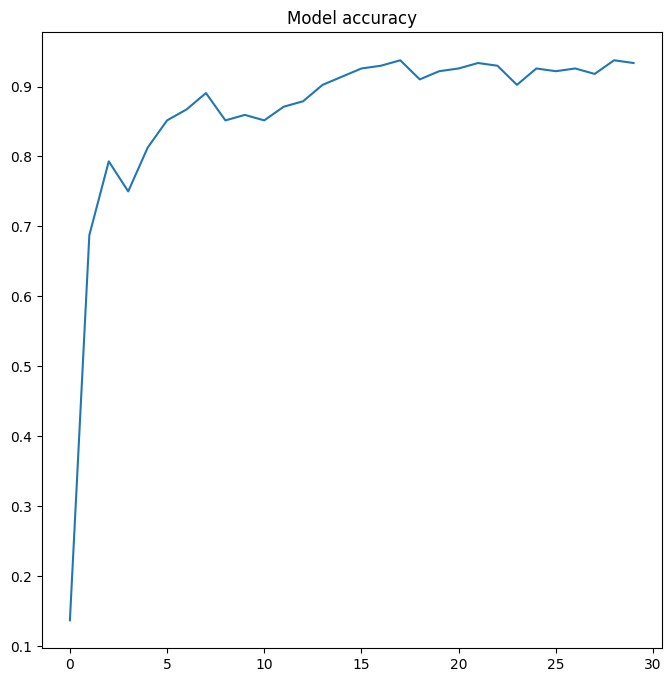

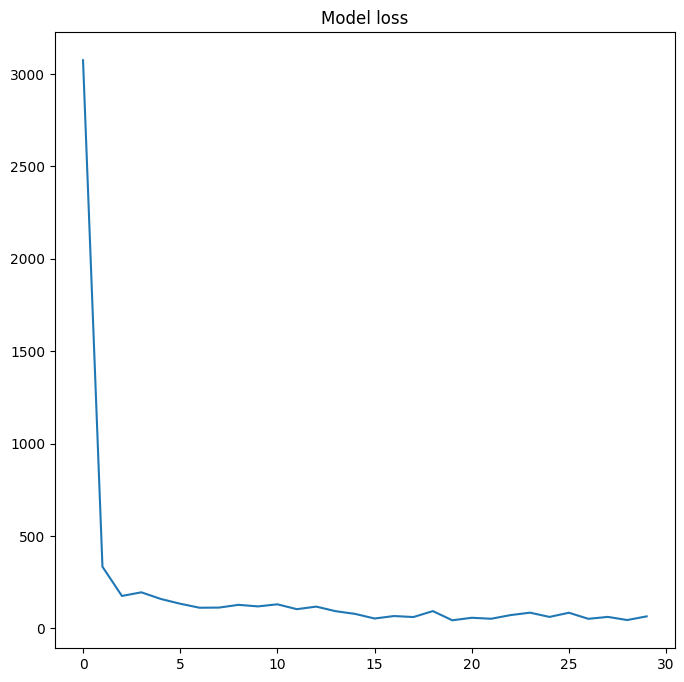

In [60]:
plt.figure(figsize=(8,8))
plt.plot(accuracy_history)
plt.title('Model accuracy')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(loss_history)
plt.title('Model loss')
plt.show()